In [1]:
#needed libraries
from __future__ import print_function, division

%matplotlib inline

import thinkstats2
import thinkplot
import matplotlib
import pandas as pd
import numpy as np

In [2]:
#creating data frame
df = pd.read_csv('basketball_player_allstar.csv')

In [12]:
#selecting 'conference' column and defining rows which will be used
west = df.points[df.conference == "West"].dropna()
east = df.points[df.conference == "East"].dropna()

In [14]:
#Showing maximum and minimum values, means, variances and standard deviations (general info)
print ("Minumum value of the West is %.2f" %west.min())
print ("Maximum of the West is %.2f" %west.max())
print ("Mean of the West is %.2f" %west.mean())
print ("Variance of the West is %.2f" %west.var())
print ("Standart deviation of the West is %.2f\n" %west.std())

print ("Minumum value of the East is %.2f" %east.min())
print ("Maximum of the East is %.2f" %east.max())
print ("Mean of the East is %.2f" %east.mean()) 
print ("Variance of the East is %.2f" %east.var())
print ("Standart deviation of the East is %.2f" %east.std())

Minumum value of the West is 0.00
Maximum of the West is 38.00
Mean of the West is 10.65
Variance of the West is 49.58
Standart deviation of the West is 7.04

Minumum value of the East is 0.00
Maximum of the East is 42.00
Mean of the East is 10.79
Variance of the East is 47.13
Standart deviation of the East is 6.87


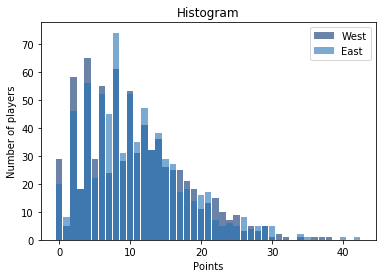

In [21]:
#analyzing datasets, then plotting them
hist_west_1 = thinkstats2.Hist(west,label="West")
hist_east_1 = thinkstats2.Hist(east,label="East")

thinkplot.Hist(hist_west_1)
thinkplot.Hist(hist_east_1)

thinkplot.Show(xlabel = 'Points',ylabel='Number of players',title='Histogram')

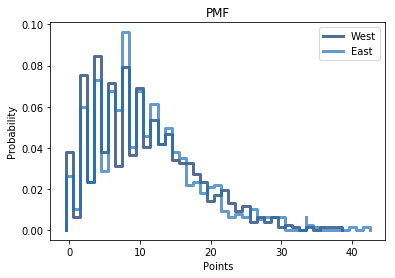

In [25]:
#analyzing datasets with pmf, then plotting them

pmf_west_1 = thinkstats2.Pmf(west,label="West")
pmf_east_1 = thinkstats2.Pmf(east,label="East")

thinkplot.Pmf(pmf_west_1)
thinkplot.Pmf(pmf_east_1)

thinkplot.Show(xlabel = 'Points',ylabel='Probability',title='PMF')

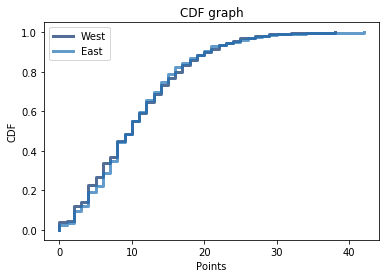

In [26]:
#analyzing datasets with cdf, then plotting them
cdf_west_1 = thinkstats2.Cdf(west,label="West")
cdf_east_1 = thinkstats2.Cdf(east,label="East")

thinkplot.Cdf(cdf_west_1)
thinkplot.Cdf(cdf_east_1)

thinkplot.Show(xlabel = 'Points',ylabel='CDF',title='CDF graph')

In [27]:
#which rows belong to west
#df.conference == "West"

In [28]:
#which rows belong to east
#df.conference == "East"

In [31]:
#showing means and standard deviations
mean_of_west, std_of_west = west.mean(), west.std()
mean_of_east, std_of_east = east.mean(), east.std()

print ('Mean of West: ' +str(mean_of_west) +', Std of West: '+ str(std_of_west))
print ('Mean of East: ' +str(mean_of_east) +', Std of East: '+ str(std_of_east)+"\n")

#analyzing pdf values
pdf_west = thinkstats2.NormalPdf(mean_of_west, std_of_west)
pdf_east = thinkstats2.NormalPdf(mean_of_east, std_of_east)

#fuction to calculate median via using cdf
def Median(x):
    cdf = thinkstats2.Cdf(x)
    return cdf.Value(0.5)

#defining medians via using Median(x) function
median_west = Median(pdf_west)
median_east = Median(pdf_east)

#showing values
print ('Median :' + str(median_west))
print ('Median :' + str(median_east)+"\n")

print ('Density of Pdf of West :' +str(pdf_west.Density(mean_of_west+ std_of_west)))
print ('Density of Pdf of East :' +str(pdf_east.Density(mean_of_east+ std_of_east)))


Mean of West: 10.6540962289, Std of West: 7.04154242958
Mean of East: 10.7932379714, Std of East: 6.86515628971

Median :10.6540962289
Median :10.7932379714

Density of Pdf of West :0.0343633127172
Density of Pdf of East :0.0352462077057


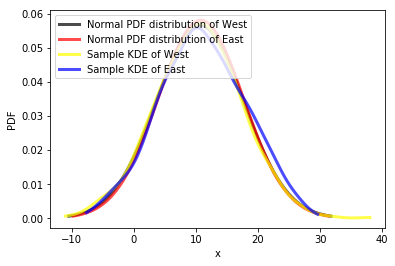

In [32]:
##comparing real pdf values and estimated pdf values

#plotting pdf analysis
thinkplot.Pdf(pdf_west, label='Normal PDF distribution of West', color='black')
thinkplot.Pdf(pdf_east, label='Normal PDF distribution of East', color='red')

#defining normals of data
norm_west = np.random.normal(mean_of_west, std_of_west, 1000)
norm_east = np.random.normal(mean_of_east, std_of_east, 1000)

#calculating estimated pdf values
pdf_west = thinkstats2.EstimatedPdf(norm_west)
pdf_east = thinkstats2.EstimatedPdf(norm_east)

#plotting estimated pdf analysis
thinkplot.Pdf(pdf_west, label='Sample KDE of West', color='yellow')
thinkplot.Pdf(pdf_east, label='Sample KDE of East', color='blue')

thinkplot.Show(xlabel='x', ylabel='PDF', loc='upper left')

In [33]:
#class to test difference in means
class DiffMeansPermute(thinkstats2.HypothesisTest):
    
    #func to get test statistics
    def TestStatistic(self, data):
        groupa, groupb = data
        teststat = abs(groupa.mean() - groupb.mean())
        return teststat

    #func to record size of groups as self.all
    def MakeModel(self):
        groupa, groupb = self.data
        self.first, self.second = len(groupa), len(groupb)
        self.all = np.hstack((groupa, groupb))

    #func to shuffle the data pool then divide it into 2 groups
    def RunModel(self):
        np.random.shuffle(self.all)
        data = self.all[:self.first], self.all[self.first:]
        return data

PValue is :0.704


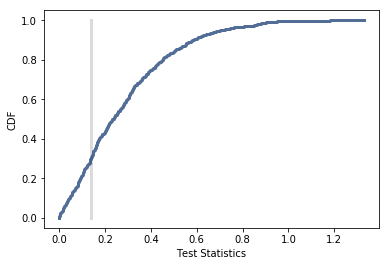

In [34]:
#plotting difference of means of west and east values
data = west.values, east.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print ('PValue is :' +str(pvalue))
ht.PlotCdf()
thinkplot.Config(xlabel='Test Statistics',
                   ylabel='CDF')

In [35]:
#func to take random sample rows from data
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

west_sample = SampleRows(west, 769)
east_sample = SampleRows(east, 769)

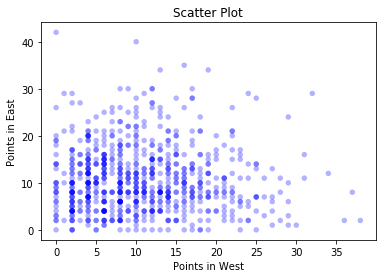

In [36]:
#scatter ploting the sample rows
thinkplot.Scatter(west_sample, east, alpha=0.3)
thinkplot.Config(xlabel='Points in West',
                 ylabel='Points in East',
                 title='Scatter Plot',
                 legend=False)

In [37]:
#func to calculate covariance
def Covariance(x, y, meanx=None, meany=None):
    x = np.asarray(x)
    y = np.asarray(y)

    if meanx is None:
        meanx = np.mean(x)
    if meany is None:
        meany = np.mean(y)

    covariance = np.dot(x-meanx, y-meany) / len(x)
    return covariance

In [40]:
#showing covariance between random west data and east data
cov1 = Covariance(west_sample,east)
print('Covariance between random west data and east data is :', cov1)

#showing covariance between random east data and west data
cov2 = Covariance(east_sample,west)
print('\nCovariance between random east data and west data is :', cov2)

Covariance between random west data and east data is : -1.39921807492

Covariance between random east data and west data is : -1.00519986945


In [41]:
#func to calculate correlation
def Correlation(x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    meanx, varx = thinkstats2.MeanVar(x)
    meany, vary = thinkstats2.MeanVar(y)

    correlation = Covariance(x, y, meanx, meany) / np.sqrt(varx * vary)
    return correlation

In [44]:
#showing covariance between random west data and east data
cor1 = Correlation(west_sample,east)*100
print('Correlation between random west data and east data is :', cor1)

#showing covariance between random east data and west data
cor2 = Correlation(east_sample,west)*100
print('\nCorrelation between random east data and west data is :', cor2)

Correlation between random west data and east data is : -2.89822632732

Correlation between random east data and west data is : -2.08208911684
